# Assignment 3: CRISP-DM Model with Titanic Dataset (max. 10 points)

Note! There is a lot of "artistic freedom" in this assignment, so don't think only about the points and try to come up with something new and creative from the data.

Loading **Titanic** dataset, and then extracting more information of the dataset and visualizing the results.
Also, few basic ML models are applied to the dataset.

## 3.1: Business Understanding (no points)

In this phase, you should define your project goals and success criteria.

**Question**: You can think what these can be for this assignment?

- **For this assignment, this project goals and success criteria could be:**

**Project Goals:**

1. **Exploratory Data Analysis (EDA):**
- Analyse the distribution of passenger survival outcomes (Survived) to understand the overall survival rate
- Explore the relationship between survival and other variables passenger class (Pclass), sex (Sex), age (Age), etc.
2. **Feature Engineering:**
- Extract additional features from the existing columns (e.g., create new features based on family size from SibSp and Parch).
- Handle missing values in columns like Age, cabin, and Embarked through imputation or other methods.
3. **Data Visualization:**
- Visualize the distribution of passengers across different categories (e.g., Pclass, Sex, Embarked) using histograms, bar charts, or pie charts.
- Create visualizations to show the survival rate among different groups (e.g., survival rate by passenger class, sex, age group)
4. **Predictive Modeling:**
- Build machine learning models to predict passenger survival based on available features.
- Evaluate the performance of the models using approriate metrics such as accuracy, precision, recall, and F1-score.

**Success Criteria:**

1. **Effective EDA:**
- Successfully identify trends and patterns in the data that could be informative for predicting survival outcomes.
2. **Feature Engineering:**
- Generate meaningful additional features that improve the predictive power of the models.
3. **Insight Visualization:**
- Create visualization that effectively communicate insights about factors influencing survival rates and aid in decision-making
4. **Predictive Modeling Perfomance:**
- Achieve a satisfactory level of accuracy in predicting passenger survival with the machine learning models.
- Compare the performance of different models and select the best-performing one based on the chosen evaluation metrics.

=> **These goals and success criteria aim to guide the analysis and exploration of the Titanic dataset, with the ultimate aim of gaining insights into survival dynamics and building predictive models that accurately classify passengers as survivors or non-survivors.**

## 3.2: Data Understanding (max. 3 points)

In the "Data Understanding" phase of this CRISP-DM project, you aim to get a grasp of your dataset and its characteristics.

What can you do in this phase?

1. Structure of dataset. Understand the dataset's structure like the number of features (columns), the data types of each feature, and the size of the dataset.
2. Summary Statistics. Calculate summary statistics for numerical features, such as mean, median etc.
3. Missing values. Identify the missing values of the dataset.
4. Data Visualization. Create data visualizations to gain insights of the Data.
5. Outlier Detection. Identify and examine potential outliers. You can use chart types like box plots or scatter plots to visualize outliers.

Implement these five requirements/tasks using Titanic dataset. Remember also to add Markdown cells to your Jupyter Notebook documents to explain.

Use also different styles in MarkDown text: like lists, figures, highlights, bold, italic, links, even direct quotes, etc.
It makes Jupyter Document easier to read and highlight the key points.

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Some warnings can be ignored in the produced notebook.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###  Structure of dataset

**Loading Titanic dataset file and then showing few lines data and information of column types.**

In [60]:
# TODO: Loading Data and show structures of the Dataset
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Show the data types of each columns**

In [61]:
# Show the data types of each feature
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**Show the size of the dataset**

In [62]:
# Show the size of the dataset (number of rows and columns)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 891
Number of columns: 12


### Showing summary statistics
Showing basic summary and information of the Dataset.

In [63]:
# TODO: Show summaries of the DataSet
summary_stats = df.describe()
summary_stats


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Calculate for numerical features one by one**

In [64]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate mean for each numerical feature
mean_values = numeric_df.mean()

# Calculate median for each numerical feature
median_values = numeric_df.median()

# Calculate standard deviation for each numerical feature
std_dev_values = numeric_df.std()

# Calculate minimum for each numerical feature
min_values = numeric_df.min()

# Calculate maximum for each numerical feature
max_values = numeric_df.max()

# Combine all summary statistics into a DataFrame for easy viewing
summary_statistics = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_dev_values,
    'Minimum': min_values,
    'Maximum': max_values
})

# Display to verify the summary statistics
summary_statistics

,Mean,Median,Standard Deviation,Minimum,Maximum
PassengerId,446.000000,446.0000,257.353842,1.00,891.0000
Survived,0.383838,0.0000,0.486592,0.00,1.0000
Pclass,2.308642,3.0000,0.836071,1.00,3.0000
Age,29.699118,28.0000,14.526497,0.42,80.0000
SibSp,0.523008,0.0000,1.102743,0.00,8.0000
Parch,0.381594,0.0000,0.806057,0.00,6.0000
Fare,32.204208,14.4542,49.693429,0.00,512.3292


### Missing values
**Calculate Missing values in the Dataset.**

**Count NaN values in each column.**

- **To calculate the missing values and identify where they occur in your dataset, we can use the `isnull()` function in pandas.**

In [65]:
# TODO: Missing values
# Calculate the missing values for each feature
missing_values = df.isnull().sum()

# Identify the columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# Print all the features (both missing one and non-missing one)
print("All the features:")
print(missing_values)


print("")

# Print columns with missing values and the corresponding counts
print("Columns with missing values:")
print(columns_with_missing)

All the features:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns with missing values:
Age         177
Cabin       687
Embarked      2
dtype: int64


### Visualization
Visualize survivors, passenger ages, survival rate etc.
And then try to find different ways to visualize draw data.

Ideas what to visualize:
* the count of survivors.
* the distribution of passenger ages.
* the survival rate by passenger class.
* the survival rate by gender.
* the survival rate by passenger class and gender.
* more visualization ideas from you?

**1. The Count of Survivors**

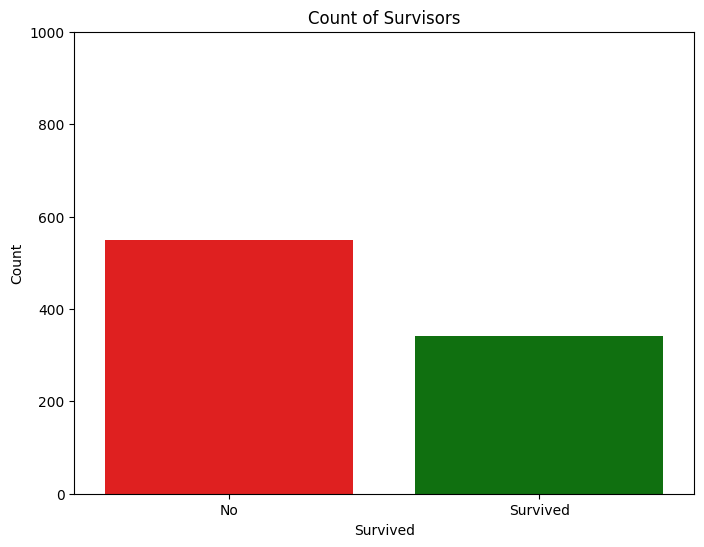

In [66]:
# Count the number of survisors
survived_count = df['Survived'].value_counts()

# Define the colors for each label
colors = ['red', 'green'] # Assign red for 'No' (0) and green for 'Yes' (1)

# Plot the count of survisors
plt.figure(figsize=(8, 6))
sns.barplot(x=survived_count.index, y=survived_count.values, palette=colors)
plt.title('Count of Survisors')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['No', 'Survived']) # Assuming 0 represents 'No' and 1 represents 'Survived'
plt.ylim(0, 1000)  # Set y-axis limit to ensure proper scale
plt.show()

**2. The distribution of Passenger Ages**

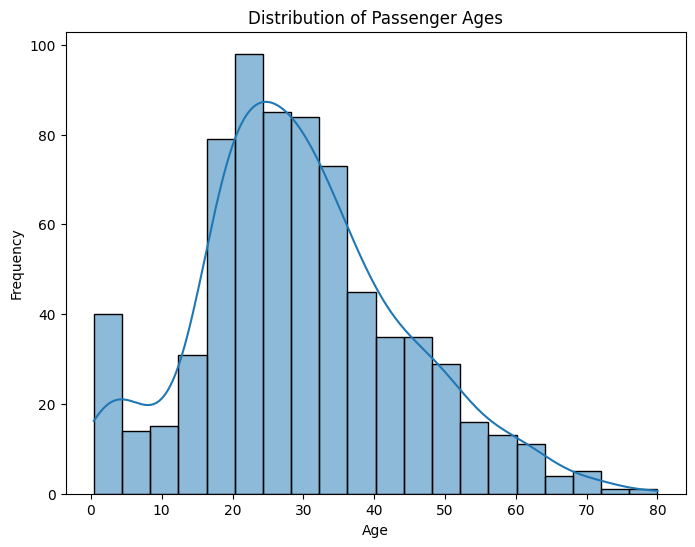

In [67]:
# The distribution of Passenger Ages
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution of Passenger Ages")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**3. Survival Rate by Passenger Class**

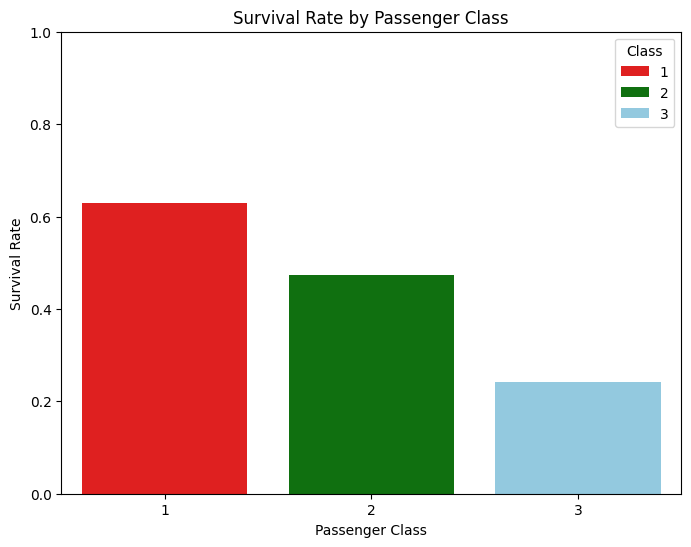

In [68]:
# Create the palette for each Passenger Class
colors = ['red', 'green', 'skyblue']

# Calculate the survival rate by passenger class
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean().reset_index() 

# Survival rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=survival_rate_by_class, ci=None, palette=colors, hue='Pclass')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper scale
plt.legend(title='Class')
plt.show()

**4. The Survival Rate by Gender**

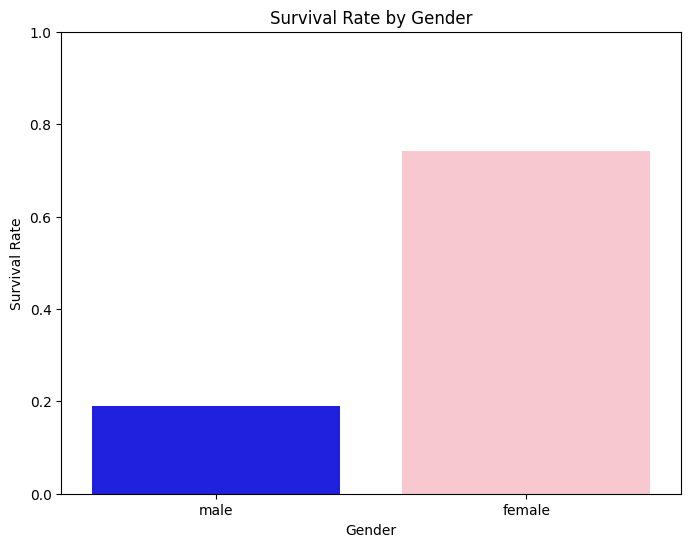

In [69]:
# Create the palette for each Passenger Class
colors = ['blue', 'pink']

# Survival Rates by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette=colors)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper scale
plt.show()


**5. Survival Rate By Passenger Class and Gender**

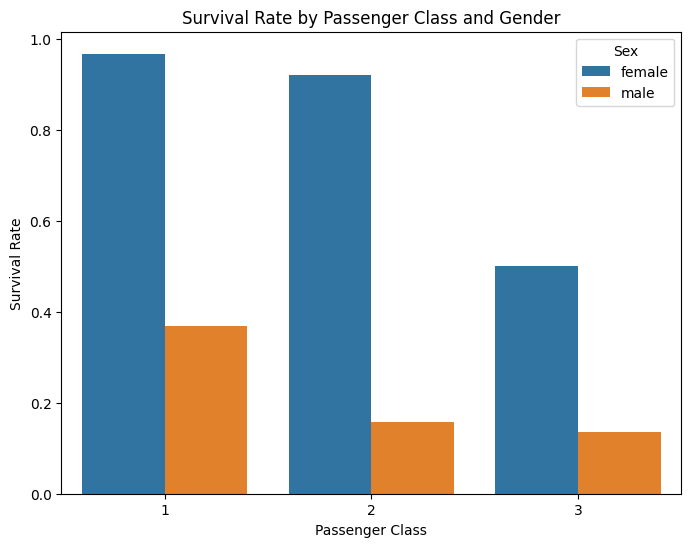

In [70]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ci=None)
plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.show()

**6. More Visualization Ideas From You?**

**There are some additional types of visualization we can visualize from the dataset**

1. **Scatter Plot**: Explore relationships between two continuous variables, such as age and fare.
2. **Box Plot**: Visualize the distribution and identify outliers for a continuous variable, such as age or fare, across different categories, such as passenger class or gender.
3. **Violin Plot**: Similar to a box plot, but provides a more informative representation of the distribution.
4. **Pair Plot**: Visualize pairwise relationships between multiple variables in the dataset.
5. **Heatmap**: Explore correlations between variables in the dataset.
6. **Count Plot**: Display the count of occurrences for a categorical variable, such as passenger class or embarked port.
7. **Pie Chart**: Show the proportion of a categorical variable, such as the distribution of passengers by gender or embarked port.

1. **Scatter Plot: Age and Fare**

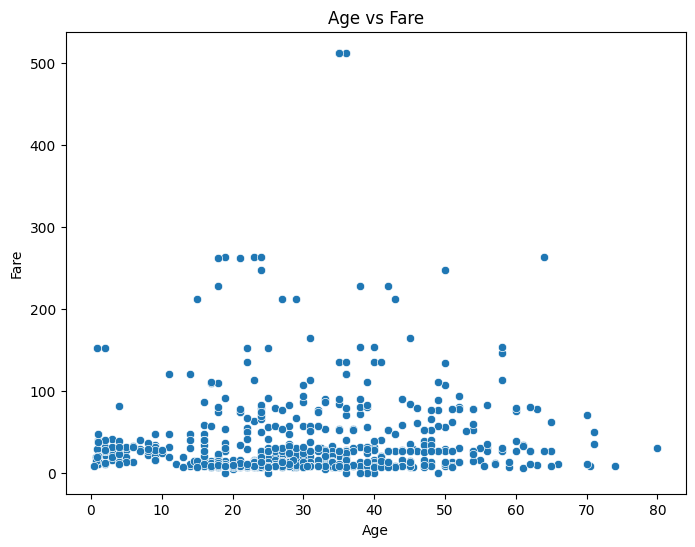

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

**2 and 3. Box Plot and Vilolin Plot: Age Distribution By Passenger Class**

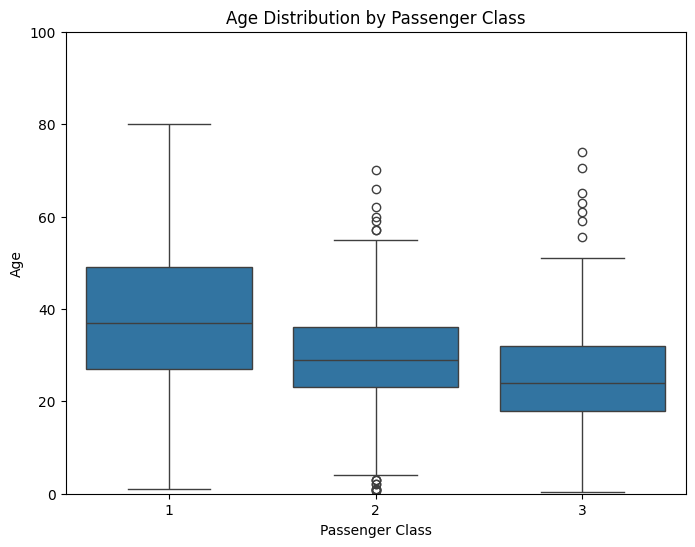

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.ylim(0, 100)  # Set y-axis limit to ensure proper scale

plt.show()

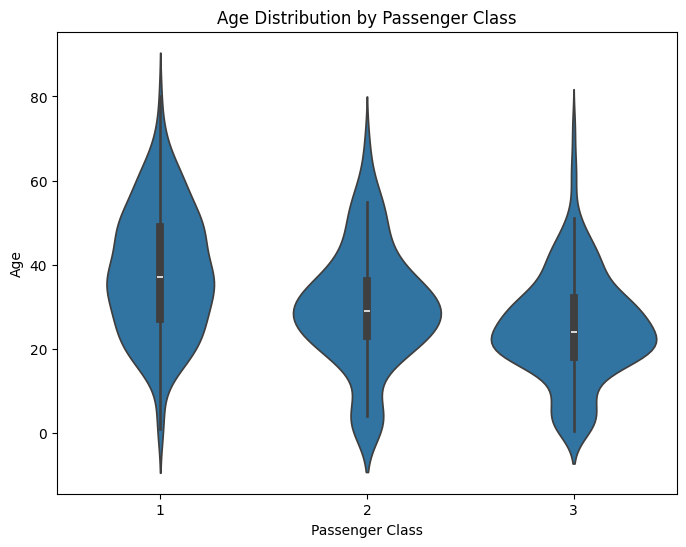

In [73]:
# Violin Plot: Age Distribution by Passenger Class
plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

**4. Pair Plot: Pairwise Relationships**

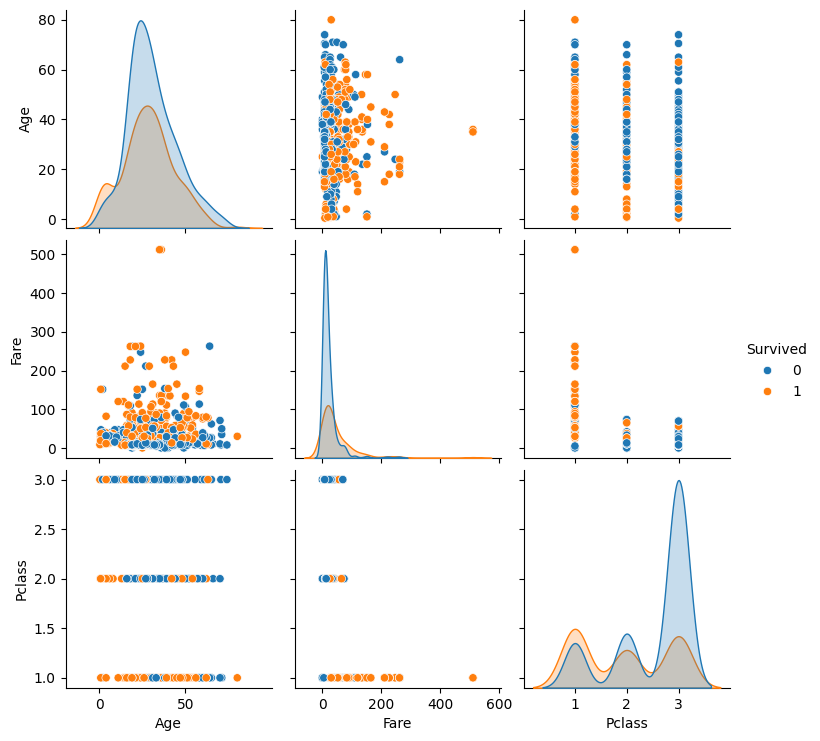

In [74]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived', diag_kind='kde')
plt.show()

**5. Heatmap: Correlation Matrix**

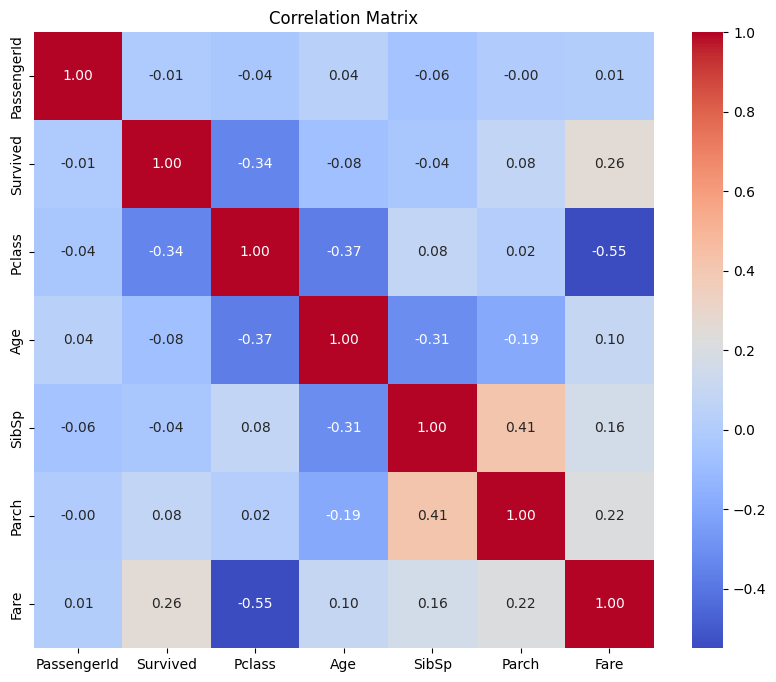

In [75]:
# Prepare data for the heatmap
# Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Visualize the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**6. Count Plot: Passenger Class**

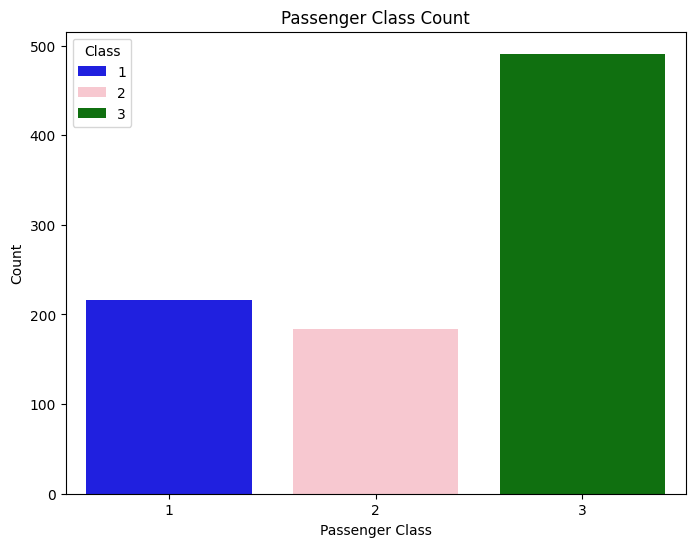

In [76]:
# Create the palette color
colors = ['blue', 'pink', 'green']
# Visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, palette=colors, hue='Pclass')
plt.title('Passenger Class Count')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

**7. Pie Chart: Gender Distribution**

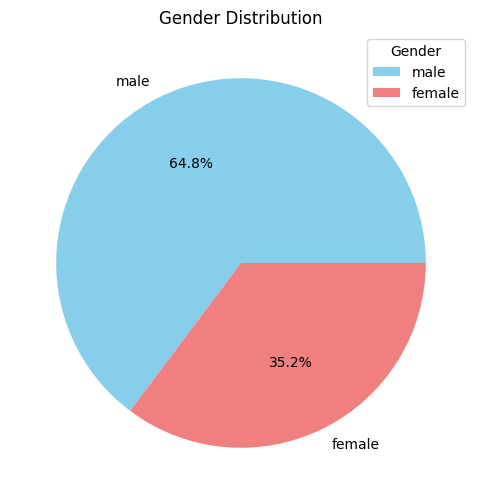

In [77]:
plt.figure(figsize=(8, 6))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.legend(title="Gender")
plt.show()


### Outlier Detection
One important step for the Quality of the data is to implement **Outlier Detection** from the data.

Notes on how to detect outliers?

* You can detect outliers using **visual inspection** of the dataset by creating scatter plots, histograms, box plots etc.
* You can use statistical Methods like **Z-Score** or **IQR**.

**Z-Score**: Calculate the z-score for each data point. If the z-score is significantly different from zero (> 2 or < -2), it may be an outlier.

Using the **IQR**, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR.
The Q1 is the 25th percentile, and Q3 is the 75th percentile of the dataset, and IQR represents the _interquartile_ range calculated by _(Q3–Q1)_.

In [78]:
# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Implemeting outlier detection using the IQR method:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)

# Print the number of outliers and the indices of the outlier data points
print("Number of outliers:", outliers.sum())
print("Indices of outliers", df.index[outliers].tolist())


Number of outliers: 293
Indices of outliers [1, 7, 8, 10, 13, 16, 24, 25, 27, 31, 33, 34, 43, 50, 52, 54, 58, 59, 61, 62, 63, 65, 68, 71, 72, 78, 85, 86, 88, 93, 96, 97, 98, 102, 116, 118, 119, 120, 124, 128, 136, 139, 140, 145, 147, 148, 151, 153, 155, 159, 160, 164, 165, 166, 167, 171, 172, 175, 176, 180, 182, 183, 184, 188, 193, 195, 197, 201, 205, 215, 218, 224, 229, 230, 233, 237, 245, 247, 248, 251, 254, 255, 256, 257, 258, 259, 261, 262, 266, 268, 269, 272, 273, 275, 278, 279, 280, 290, 291, 297, 299, 305, 306, 307, 310, 311, 312, 314, 318, 319, 323, 324, 325, 328, 329, 332, 334, 336, 337, 340, 341, 348, 352, 356, 360, 362, 366, 369, 373, 374, 375, 377, 380, 381, 385, 386, 390, 393, 394, 407, 409, 412, 416, 417, 419, 423, 424, 435, 436, 437, 438, 440, 445, 446, 448, 450, 453, 456, 469, 472, 479, 480, 484, 485, 486, 489, 493, 496, 498, 504, 505, 506, 520, 523, 527, 529, 530, 532, 533, 535, 537, 539, 540, 541, 542, 544, 548, 549, 550, 557, 558, 567, 580, 581, 585, 587, 591, 593, 5

**=> The reason why we need to find outliers:**

**Detecting outliers is important for several reasons:**

1. **Data Quality Assurance**: Outliers may indicate errors in data collection, entry, or processing. Identifying and addressing outliers can help improve the overall quality and reliability of the dataset.
2. **Impact on Statistical Analysis**: Outliers can skew statistical measures such as the mean, standard deviation, and correlation, leading to misleading interpretations of the data. Removing or addressing outliers can help ensure that statistical analyses accurately reflect the underlying patterns in the data.
3. **Model Performance**: Outliers can have a significant impact on the performance of predictive models. Models trained on datasets containing outliers may produce less accurate predictions or exhibit poor generalization to new data. Removing outliers or using robust modeling techniques can improve model performance.
4. **Assumption Violations**: Many statistical methods and machine learning algorithms assume that the data are normally distributed or have certain properties. Outliers can violate these assumptions, leading to biased estimates or unreliable results. Identifying outliers allows for appropriate adjustments to be made to ensure that analysis methods are applied correctly.
5. **Anomaly Detection**: In some cases, outliers may represent valuable insights or anomalies in the data. Detecting and analyzing outliers can help uncover hidden patterns, anomalies, or unusual behaviors that merit further investigation.

=> **Overall, detecting and handling outliers is an essential step in data preprocessing and analysis, contributing to the reliability, interpretability, and effectiveness of data-driven decision-making processes.**

## 3.3: Data preprocessing (max. 4 points)

Data preprocessing is an important step to ensure your dataset is ready for machine learning phase.
Here are your most important tasks for data preprocessing phase with the Titanic dataset.

1. Handling Missing Values. You should decide how to handle missing values.
2. Feature engineering. You can create new features or transform existing ones. With this dataset, you can extract titles from passenger names, create a family size feature, have a passenger a cabin or not, or categorize age and fare into groups.
3. Visualization. Do visualization with new features. And also recalculate statistics after data is preprocessed.
4. Categorical Variable Encoding. You need to encode categorical variables for a Machine Learning model. Select method from one-hot encoding, label encoding, or ordinal encoding.
5. Feature Scaling. Scaling features, such as age or fare. Select standardization or min-max scaling method for scaling.

### Handling Missing Values
NaN (and Inf) values are problems for ML models.

**Here are some common strategies for handling NaN and Inf values in Data Preprocessing:**

1. **Identify and Understand the Source**: Before deciding on a handling strategy, it's essential to understand the source of NaN and Inf values in your dataset. They may arise from various sources such as data entry errors, missing measurements, division by zero, or numerical calculations.
2. **Remove and Filter Out**: If the number of NaN or Inf values is small and randomly distributed, you may choose to remove or filter out the affected rows or columns. However, this approach should be used judiciously, as it may lead to loss of valuable information.
3. **Imputation**: Imputation involves replacing NaN and Inf values with substituted values. Common imputation techniques include:
- *Mean/Median/Mode Imputation*: Replace NaN and Inf values with the mean, median, or mode of the column.
- *Constant Value Imputation*: Replace NaN and Inf values with a predefined constant value.
- *Forward Fill/Backward Fill*: Use the value from the previous or next observation to fill in NaN and Inf values.
- *Predictive Imputation*: Use machine learning algorithms to predict missing values based on other variables in the dataset.
4. **Indicator Variable**: Create a new binary indicator variable that flags whether a value was NaN or Inf. This approach allows you to retain information about missingness while still using the original data.
5. **Data Transformation**: Depending on the context of your data, you may apply data transformations to handle NaN and Inf values. For example:
- *Log Transformation*: Take the logarithm of the data to handle large values that result in Inf.
- *Scaling*: Apply scaling techniques such as min-max scaling or standardization to rescale the data and avoid numerical instabilities.
6. **Model-Based Approaches**: Some advanced techniques involve using machine learning models to handle NaN and Inf values more effectively. For example:
- *K-nearest Neighbors (KNN) Imputation*: Use KNN to impute missing values based on similar data points.
- *Matrix Factorization Techniques*: Apply matrix factorization methods like Singular Value Decomposition (SVD) to fill in missing values based on latent factors in the data.

=> **The choice of handling strategy depends on factors such as the nature and distribution of NaN and Inf values, the impact on downstream analyses or models, and domain-specific considerations. It's essential to evaluate the potential impact of the chosen strategy on the validity and reliability of your analyses or models. Additionally, thorough data exploration and understanding of the underlying data generation process are crucial for selecting an appropriate handling strategy.**

In [79]:
# TODO: Handling Missing Values values
# Impute missing values
# Mean imputation for numerical columns
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Mode imputation for Categorical Columns
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)

# Verify that missing values have been filled
missing_values_after_imputation = df.isnull().sum()
print("Missing Values After Imputation:")
print(missing_values_after_imputation)

Missing Values After Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Feature engineering

You can create new features or transform existing ones.

Some ideas what new features/columns to create.

* Create a new feature `HasCabin` (has a cabin or not).
* Create a new feature `HasEmbarked` (has an embarkation port or not).
* Extract `ticketNumber` and `price` features of tickets.
* Create a new feature `FamilySize`.
* Create a new feature `Deck` from `Cabin` column.
* Extract a new feature `title` from the `Name`.
* More ideas from you.

Extra Question: Are there any passengers who share the same ticket number?

**1. Create a new feature `HasCabin` (has a cabin or not)**

In [80]:
# Define a function to check if Cabin is missing
def has_cabin(cabin):
    if cabin == "Unknown":
       return 0  # 0 indicates no cabin
    else:
       return 1  # 1 indicates having a cabin
        
# Apply the function to create the HasCabin feature
df['HasCabin'] = df['Cabin'].apply(has_cabin)

# Display the updated dataset with the new feature
print(df[['Cabin', 'HasCabin']].head(15))

      Cabin  HasCabin
0   Unknown         0
1       C85         1
2   Unknown         0
3      C123         1
4   Unknown         0
5   Unknown         0
6       E46         1
7   Unknown         0
8   Unknown         0
9   Unknown         0
10       G6         1
11     C103         1
12  Unknown         0
13  Unknown         0
14  Unknown         0


**2. Create a feature `HasEmbarked` (has an embarkation or not)**

In [81]:
# Create the HasEmbark feature
df['HasEmbarked'] = df['Embarked'].notnull().astype(str)

# Display the updated dataset with the new feature
print(df[['Embarked', 'HasEmbarked']].tail(10))

    Embarked HasEmbarked
881        S        True
882        S        True
883        S        True
884        S        True
885        Q        True
886        S        True
887        S        True
888        S        True
889        C        True
890        Q        True


**3. Extract `TicketNumber` and `price` features of tickets**

In [82]:
# Extract TicketNumber and Price features
df['TicketNumber'] = df['Ticket'].str.split().str[-2]
df['Price'] = df['Ticket'].str.split().str[-1]

# Display the updated DataFrame
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked,TicketNumber,Price
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,0,True,A/5,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,True,PC,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,True,STON/O2.,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,True,NaN,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,True,NaN,373450


**4. Create a new feature `FamilySize`**

In [83]:
# Create the FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # Add 1 to include the passenger themselves

# Display the updated DataFrame
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked,TicketNumber,Price,FamilySize
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,Unknown,S,0,True,NaN,211536,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S,1,True,NaN,112053,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,Unknown,S,0,True,W./C.,6607,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C,1,True,NaN,111369,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Unknown,Q,0,True,NaN,370376,1


**5. Create the new feature `Deck` from `Cabin` Column:**

In [84]:
# Extract Deck from Cabin
df['Deck'] = df['Cabin'].str[0]

# Display the updated DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked,TicketNumber,Price,FamilySize,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,0,True,A/5,21171,2,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,True,PC,17599,2,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,True,STON/O2.,3101282,1,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,True,NaN,113803,2,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,True,NaN,373450,1,U


**6. Extract a new feature `Title` from the `Name`**

In [85]:
# Extract the Title from Name
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked,TicketNumber,Price,FamilySize,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,0,True,A/5,21171,2,U,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,True,PC,17599,2,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,True,STON/O2.,3101282,1,U,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,True,NaN,113803,2,C,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,True,NaN,373450,1,U,Mr


**More ideas from you**

**Here can be some additional ideas for creating new features or transforming existing ones in the dataset:**

1. **Age Group**: Group passengers into different age groups (e.g., child, adult, senior) based on their age.
2. **Alone**: Create a binary feature indicating whether the passenger was traveling alone (i.e., without any family members).
3. **Fare per Person**: Calculate the fare per person by dividing the fare by the family size.
4. **Title Grouping**: Group similar titles together to reduce the number of unique titles (e.g., combining 'Miss' and 'Ms').
5. **Family Survival Rate**: Calculate the survival rate of the entire family based on the survival status of family members.
6. **Cabin Count**: Count the number of cabins a passenger has (if they have multiple cabins).
7. **Ticket Frequency**: Count how many times each ticket number appears in the dataset to identify passengers sharing the same ticket.
8. **HasFamily**: Create a binary feature indicating whether the passenger has any family members onboard (based on SibSp and Parch).
9. **Age* Class**: Create a new feature by multiplying age and class to capture the combined effect of age and socioeconomic status.

**Example: Creating the Alone feature**

In [86]:
# Create the Alone feature
df['Alone'] = (df['SibSp'] + df['Parch']) == 0

# Display the updated DateFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,HasEmbarked,TicketNumber,Price,FamilySize,Deck,Title,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,0,True,A/5,21171,2,U,Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,True,PC,17599,2,C,Mrs,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,True,STON/O2.,3101282,1,U,Miss,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,True,NaN,113803,2,C,Mrs,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,0,True,NaN,373450,1,U,Mr,True


**Extra Question: Are there any passengers who share the same ticket number?**

- **To find out if there are any passengers who share the same ticket number, it means that the frequency of each ticket number will be greater than 1**

In [87]:
# Count the frequency of each ticket number
ticket_counts = df['Ticket'].value_counts()

# Find ticket numbers with frequency greater than 1
shared_tickets = ticket_counts[ticket_counts > 1]

if shared_tickets.empty:
    print("There are no passengers who share the same ticket number.")
else:
    print("Passengers who share the same ticket number:")
    print(df[df['Ticket'].isin(shared_tickets.index)])

Passengers who share the same ticket number:
     PassengerId  Survived  Pclass  \
3              4         1       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
..           ...       ...     ...   
876          877         0       3   
879          880         1       1   
880          881         1       2   
885          886         0       3   
888          889         0       3   

                                                  Name     Sex        Age  \
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
7                       Palsson, Master. Gosta Leonard    male   2.000000   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
10                     Sandstrom, Miss. Marguerite Rut  female   4.000000   
..                                  

### Visualize new features

Do visualization with selected new features.

Some ideas what to visualize:
* Visualize based on ticket prefixes.
* Visualize based on ticket numbers.
* Show the survivors based on `Pclass` and embarkation port.
* Also other new features can be used to visualization.

**1. Visualize based on ticket prefixes:**

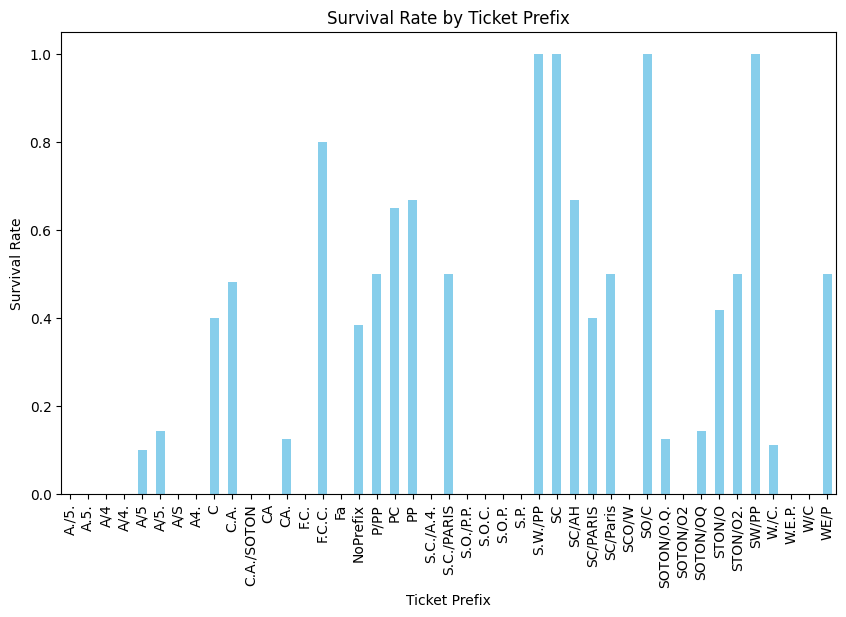

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,HasCabin,HasEmbarked,TicketNumber,Price,FamilySize,Deck,Title,Alone,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,True,A/5,21171,2,U,Mr,False,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,True,PC,17599,2,C,Mrs,False,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,True,STON/O2.,3101282,1,U,Miss,True,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,True,NaN,113803,2,C,Mrs,False,NoPrefix
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,True,NaN,373450,1,U,Mr,True,NoPrefix


In [88]:
# Extract ticket prefixes
df['TicketPrefix'] = df['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'NoPrefix')

# Visualize based on ticket prefixes
plt.figure(figsize=(10, 6))
df.groupby('TicketPrefix')['Survived'].mean().plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Ticket Prefix')
plt.xlabel('Ticket Prefix')
plt.ylabel('Survival Rate')
plt.show()

df.head()



**2.Visualize based on ticket numbers**

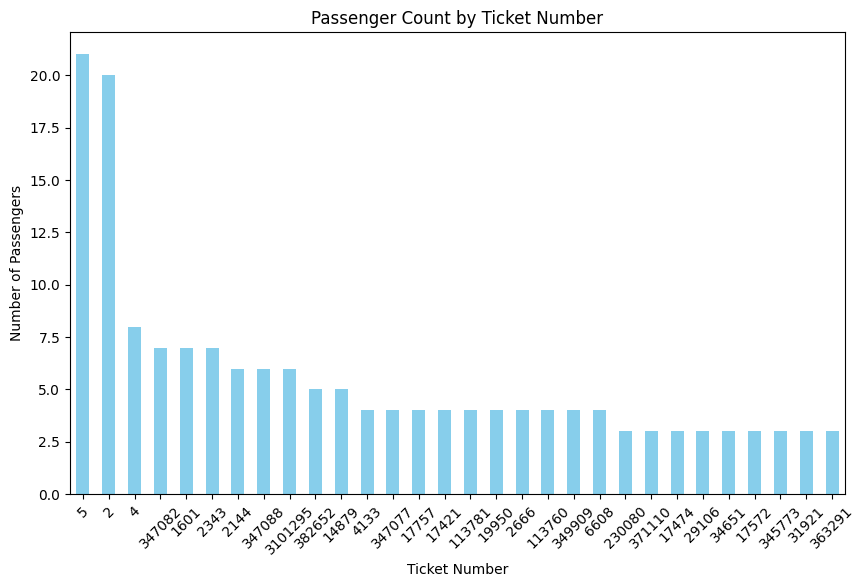

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,HasCabin,HasEmbarked,TicketNumber,Price,FamilySize,Deck,Title,Alone,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,True,5,21171,2,U,Mr,False,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,True,17599,17599,2,C,Mrs,False,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,True,2,3101282,1,U,Miss,True,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,1,True,113803,113803,2,C,Mrs,False,NoPrefix
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,True,373450,373450,1,U,Mr,True,NoPrefix


In [89]:
# Extract ticket numbers
df['TicketNumber'] = df['Ticket'].str.extract(r'(\d+)')

# Count occurrences of each ticket number
ticket_counts = df['TicketNumber'].value_counts()

# Visualize based on ticket numbers
top_n = 30  # Change this value to visualize more or fewer ticket prefixes
plt.figure(figsize=(10, 6))
ticket_counts.head(top_n).plot(kind='bar', color='skyblue')
plt.title('Passenger Count by Ticket Number')
plt.xlabel('Ticket Number')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.show()

df.head()

**3. Show survivors based on Pclass and embarkation port**

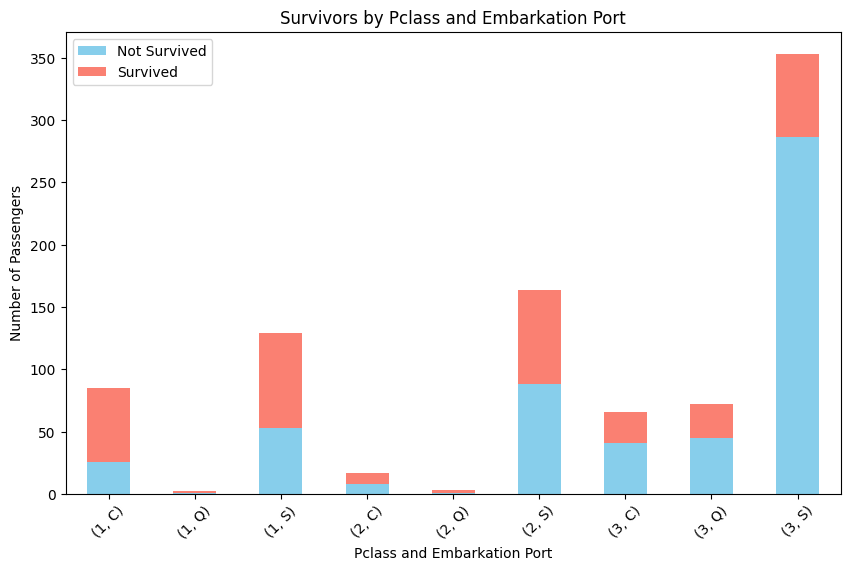

In [90]:
# Filter out missing values in 'Embarked' Column
df.dropna(subset=['Embarked'], inplace=True)

# Group data by 'Pclass' and 'Embarked', count survivors and non-survivors
survivors_by_class_port = df.groupby(['Pclass', 'Embarked', 'Survived']).size().unstack(fill_value=0)

# Plot the grouped bar plot
survivors_by_class_port.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
plt.title('Survivors by Pclass and Embarkation Port')
plt.xlabel('Pclass and Embarkation Port')
plt.ylabel('Number of Passengers')
plt.legend(['Not Survived', 'Survived'], loc='upper left')
plt.xticks(rotation=45)
plt.show()


**Also other new features can be used to visualization**

- **The Relationship of SibSp and Parch**

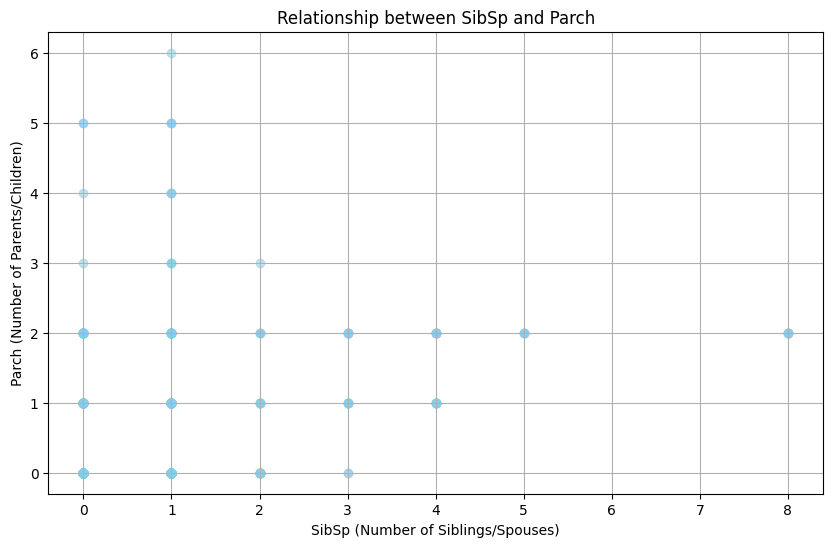

In [91]:
# Visualize the relationship of SibSp and Parch
plt.figure(figsize=(10, 6))
plt.scatter(df['SibSp'], df['Parch'], color='skyblue', alpha=0.5)
plt.title('Relationship between SibSp and Parch')
plt.xlabel('SibSp (Number of Siblings/Spouses)')
plt.ylabel('Parch (Number of Parents/Children)')
plt.grid(True)
plt.show()

- **Survival Rate By Deck**

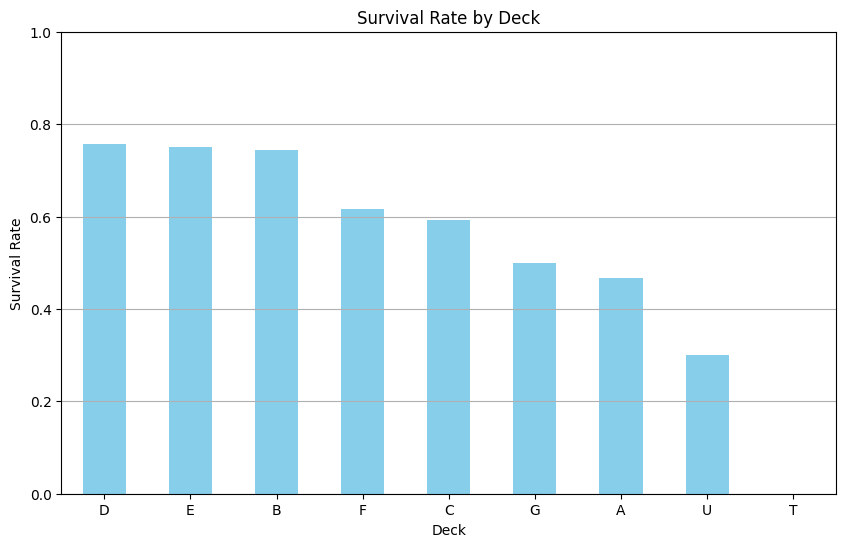

In [92]:
# Drop rows with missing deck information
df.dropna(subset=['Deck'], inplace=True)

# Calculate survival rate by deck
survival_by_deck = df.groupby('Deck')['Survived'].mean().sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
survival_by_deck.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Set y-axis limit to ensure the range is from 0 to 1 for survival rate
plt.grid(axis='y')
plt.show()

### Categorical Variable Encoding

Why Categorical Variable Encoding?

 * You need to encode categorical variables for a Machine Learning model.
 * Select your encoding method from these: one-hot encoding, label encoding, or ordinal encoding.

** Here could be some encoding method:**

**1. One-Hot Encoding:**
- **Usage**: Use when the categorical variable does not have a natural order or hierarchy.
- **Description**: Each category is represented as a binary vector where only one bit is hot (1) and the others are cold (0).
- **Example**: If a categorical variable has three categories (A, B, C), one-hot encoding would create three binary columns: A (1 or 0), B (1 or 0), and C (1 or 0).
- **Library**: One-hot encoding can be implemented using the OneHotEncoder class from scikit-learn.

**2. Label Encoding:**
- **Usage**: Use when the categorical variable has a natural order or hierarchy.
- **Description**: Each category is assigned a unique integer label.
- **Example**: If a categorical variable has three categories (Low, Medium, High), label encoding would assign integers (0, 1, 2) respectively.
- **Library**: Label encoding can be implemented using the LabelEncoder class from scikit-learn.

**3. Ordinal Encoding**:
- **Usage**: Use when the categorical variable has a natural order or hierarchy, but the distance between categories is not meaningful.
- **Description**: Similar to label encoding, but the assigned integer labels are ordered based on the natural order of the categories.
- **Example**: If a categorical variable has three categories (Cold, Warm, Hot), ordinal encoding might assign integers (0, 1, 2) respectively.
- **Library**: Ordinal encoding can be implemented using custom mappings or the OrdinalEncoder class from scikit-learn.

**=> Based on your data and the nature of your categorical variables, you can choose the most appropriate encoding method. If your categorical variables have no inherent order, one-hot encoding is generally a safe choice. If there is a meaningful order, you can consider using label encoding or ordinal encoding.**

In [115]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'Sex' column
df['Sex_Encoded'] = label_encoder.fit_transform(df['Sex'])

# Convert 'Alone' column to float
df['Alone'] = df['Alone'].astype(float)

# Label encoding for 'Embarked' variable
label_encoder = LabelEncoder()
label_encoded_embarked = label_encoder.fit_transform(df['Embarked'])

# Ordinal encoding for 'Embarked' variable
ordinal_encoder = OrdinalEncoder(categories=[['C', 'Q', 'S']])
ordinal_encoded_embarked = ordinal_encoder.fit_transform(df[['Embarked']])

# Add the encoded variables to the dataset
df['Embarked_LabelEncoded'] = label_encoded_embarked
df['Embarked_OrdinalEncoded'] = ordinal_encoded_embarked

# Print the first few rows to verify the encoding
print(df.iloc[181])

PassengerId                             182
Survived                                  0
Pclass                                    2
Name                       Pernot, Mr. Rene
Sex                                       1
Age                               29.699118
SibSp                                     0
Parch                                     0
Ticket                        SC/PARIS 2131
Fare                                  15.05
Cabin                               Unknown
Embarked                                  C
HasCabin                                  0
HasEmbarked                            True
TicketNumber                           2131
Price                                  2131
FamilySize                                1
Deck                                      U
Title                                    Mr
Alone                                   1.0
TicketPrefix                       SC/PARIS
Sex_Encoded                               1
Embarked_LabelEncoded           

### Feature Scaling

Why Feature Scaling?

* Scale all non-numerical features for a Machine Learning model.
* Features in your dataset might have different scales, which can vary widely.
* Most of the Machine Learning methods benefit from scaled features.

There are several common methods for feature scaling:

1. **Min-Max Scaling** scales features to a specific range (commonly 0 to 1 or -1 to 1).
2. **Standardization** (Z-Score) scales features to have a mean of 0 and a standard deviation of 1.
3. **Robust Scaling** uses the median and interquartile range to scale features.

- **Feature scaling is essential in machine learning for several reasons:**

1. **Normalization of Features**: Features in a dataset may have different scales, ranges, and units. Feature scaling brings all features to a similar scale, making comparisons and interpretations more meaningful.
2 **Avoiding Bias**: Some machine learning algorithms are sensitive to the scale of features. For example, algorithms like k-nearest neighbors (KNN) and support vector machines (SVM) calculate distances between data points, so features with larger scales may dominate the distance calculations and introduce bias.
3. **Faster Convergence**: Gradient-based optimization algorithms, such as gradient descent, converge faster when features are on a similar scale. This can lead to faster training times and more efficient optimization.
4. **Improved Performance**: Scaling features often leads to better model performance. It can help prevent certain features from overshadowing others and ensure that the model learns from all features equally.
5. **Regularization**: Regularization techniques, such as L1 and L2 regularization, penalize large coefficients in regression models. Feature scaling can prevent features with larger scales from receiving disproportionately large coefficients and being overly penalized.

In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Select only numerical columns for scaling
df_numerical = df[numerical_columns]

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_min_max_scaled[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Standardization (Z-score normalization)
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

## 3.4: Modelling (max. 3 points)

Target is to do **Titanic Survival Prediction with Machine Learning**.
You should build and compare machine learning models for predicting passenger survival on the Titanic.

1) Data Splitting

    * Split the dataset into training and testing sets (e.g., _80% training_ and _20% testing_) to evaluate model performance.

2) Modeling

    * Implement two different classifiers: **k-Nearest Neighbors** (kNN), and **Random Forest** (RF).
    * Train each model on the training data.

3) Model Evaluation

    * Evaluate the performance of each model on the testing data using evaluation metrics such as accuracy, precision and F1-score.

4) Comparison

    * Compare the results of the classifiers to determine which one performs the best in terms of survival prediction.

5) Conclusion

    * Summarize your findings and provide insights into which model is most suitable for predicting Titanic passenger survival based on the dataset.
    * Include visualizations and explanations to explain your findings.

Note: You may consider hyperparameter tuning for the classifiers and further data exploration to enhance your analysis.
You can find with hyperparameter tuning the best configuration for each model. This can increase the performance of your model.

### Preprocessing Data for Machine Learning phase

Select the features and target variable for an ML process.
Process rows with `NaN` values.

In [95]:
from sklearn.impute import SimpleImputer

# Features (Independent Variables)
features = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'TicketPrefix']]

# Target variable (dependent variable)
target = df['Survived']

# Process rows with NaN values
# Option 1: Remove rows with missing values
df_cleaned = df.dropna()

# Option 2: Impute missing values
# imputer = SimpleImputer(strategy='mean')  # Use mean imputation
# features_imputed = imputer.fit_transform(features)

### Data Splitting

Always Split the data into **training** and **test sets**.

Use the following properties for split the data in this assignment:

* `y` is the target variable to predict.
* `Test_size=0.2` specifies that 20% of the data will be used for testing.
* `Random_state=42` is used to set a seed for the random number generator, and it ensures that the split will be reproducible.
* `Stratify=y` ensures that the class distribution in the target variable is preserved in both the training and testing sets.

In [121]:
from sklearn.model_selection import train_test_split

# Assume X contains your features and y contains your target variable
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'HasEmbarked', 'TicketPrefix', 'Title', 'Price', 'Deck', 'TicketNumber'])  # Features
y = df['Survived']  # Target variable


# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Modeling
Implement

1. k-Nearest Neighbors (kNN), and
2. Random Forest ML models

to create Machine Learning models to make predictions with data.

Create these **two different** ML models. Then train the models and make predictions using trained ML models with separate test data.

In [122]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Remove rows with missing values in the 'Deck' column
df.dropna(subset=['Deck'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Fit and transform the 'Embarked' column
df['Embarked_Encoded'] = label_encoder.fit_transform(df['Embarked'])

# Instantiate kNN and Random Forest classifiers
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(random_state=42)

# Train kNN classifier
knn_classifier.fit(X_train, y_train)

# Train Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions using the trained models
knn_predictions = knn_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the accuracy of the models
knn_accuracy = accuracy_score(y_test, knn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("kNN Model Accuracy:", knn_accuracy)
print("Random Forest Model Accuracy:", rf_accuracy)



kNN Model Accuracy: 0.5977653631284916
Random Forest Model Accuracy: 0.770949720670391


#### importance values

Show the importance values of an ML learning process in descending order if it's possible with the ML method used.

In [123]:
# TODO: Show importance values.
print("kNN Model Accuracy:", knn_accuracy)
print("Random Forest Model Accuracy:", rf_accuracy)

kNN Model Accuracy: 0.5977653631284916
Random Forest Model Accuracy: 0.770949720670391


In [124]:
# Assuming you have trained a RandomForestClassifier named 'rf_model'
importance = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(feature_importance_df)

                    Feature  Importance
9               Sex_Encoded    0.226202
5                      Fare    0.184040
0               PassengerId    0.176447
2                       Age    0.152589
6                  HasCabin    0.061863
1                    Pclass    0.061498
7                FamilySize    0.040044
3                     SibSp    0.025745
4                     Parch    0.021798
11  Embarked_OrdinalEncoded    0.014041
10    Embarked_LabelEncoded    0.013425
12         Embarked_Encoded    0.013295
8                     Alone    0.009011


### Evaluate

Evaluate the performance of each model.  Calculate metrics that can be compared.

Evaluate all the models.

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the accuracy of the models
knn_accuracy = accuracy_score(y_test, knn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate precision
knn_precision = precision_score(y_test, knn_predictions)
rf_precision = precision_score(y_test, rf_predictions)

# Calculate recall
knn_recall = recall_score(y_test, knn_predictions)
rf_recall = recall_score(y_test, rf_predictions)

# Calculate F1-score
knn_f1 = f1_score(y_test, knn_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Calculate ROC AUC score (for binary classification)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)

# Show all the evaluations
print("Random Forest Classifier Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)

print("\nK-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("ROC AUC Score:", knn_roc_auc)


Random Forest Classifier Metrics:
Accuracy: 0.770949720670391
Precision: 0.7121212121212122
Recall: 0.6811594202898551
F1 Score: 0.6962962962962963
ROC AUC Score: 0.7542160737812911

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.5977653631284916
Precision: 0.4727272727272727
Recall: 0.37681159420289856
F1 Score: 0.41935483870967744
ROC AUC Score: 0.5565876152832674


### Comparison

Compare the results of the classifiers.

In [129]:
# TODO: Comparison of results
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc],
    'k-Nearest Neighbors': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc]
})

# Set the 'Metric' column as the index
results_df.set_index('Metric', inplace=True)

# Display the results DataFrame
print(results_df)


           Random Forest  k-Nearest Neighbors
Metric                                       
Accuracy        0.770950             0.597765
Precision       0.712121             0.472727
Recall          0.681159             0.376812
F1-Score        0.696296             0.419355
ROC AUC         0.754216             0.556588


### Conclusion

Summarize your findings.

**TODO: Conclusion (write this conclusion with MarkDown)**

**Based on the comparison of the two classifiers:**

- Random Forest achieved higher scores across all metrics compared to k-Nearest Neighbors.
- Random Forest had an accuracy of 77.10%, while k-Nearest Neighbors had an accuracy of 59.78%.
- Random Forest had higher precision, recall, F1-score, and ROC AUC compared to k-Nearest Neighbors.
- Overall, Random Forest outperformed k-Nearest Neighbors in this classification task, indicating that it may be a better choice for predicting survival on the Titanic dataset.